In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Read csv

The dataset

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

In [157]:
df = pd.read_csv('winequalityN.csv')

### 2. Show some values using head() method

In [158]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 3. Checking if dataset has null values

As we can see, there are columns with null values, we need to decide what has to be done.

In [159]:
def info_dataset(df):
    tab_info = pd.DataFrame(df.dtypes).T.rename(index={0: 'types'})
    tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'is null'}))
    tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0: 'is null'}))
    return tab_info

info_dataset(df)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
is null,0,10,8,3,2,2,0,0,0,9,4,0,0
is null,0,0.153917,0.123134,0.0461752,0.0307834,0.0307834,0,0,0,0.138525,0.0615669,0,0


### 4. For the next step, we getting the average value per column and setting average value when has been null

In [160]:
df['fixed acidity'].describe()

count    6487.000000
mean        7.216579
std         1.296750
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

In [161]:
df.loc[df['fixed acidity'].isnull(), 'fixed acidity'] = 7.21

In [162]:
info_dataset(df)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
is null,0,0,8,3,2,2,0,0,0,9,4,0,0
is null,0,0,0.123134,0.0461752,0.0307834,0.0307834,0,0,0,0.138525,0.0615669,0,0


In [163]:
df['volatile acidity'].describe()

count    6489.000000
mean        0.339691
std         0.164649
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile acidity, dtype: float64

In [164]:
df.loc[df['volatile acidity'].isnull(), 'volatile acidity'] = 0.33

In [165]:
info_dataset(df)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
is null,0,0,0,3,2,2,0,0,0,9,4,0,0
is null,0,0,0,0.0461752,0.0307834,0.0307834,0,0,0,0.138525,0.0615669,0,0


In [166]:
df['citric acid'].describe()

count    6494.000000
mean        0.318722
std         0.145265
min         0.000000
25%         0.250000
50%         0.310000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

In [167]:
df['residual sugar'].describe()

count    6495.000000
mean        5.444326
std         4.758125
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64

In [168]:
df['chlorides'].describe()

count    6495.000000
mean        0.056042
std         0.035036
min         0.009000
25%         0.038000
50%         0.047000
75%         0.065000
max         0.611000
Name: chlorides, dtype: float64

In [169]:
df['pH'].describe()

count    6488.000000
mean        3.218395
std         0.160748
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [170]:
df['sulphates'].describe()

count    6493.000000
mean        0.531215
std         0.148814
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

In [171]:
df.loc[df['citric acid'].isnull(), 'citric acid'] = 0.31
df.loc[df['residual sugar'].isnull(), 'residual sugar'] = 4.75
df.loc[df['chlorides'].isnull(), 'chlorides'] = 0.056
df.loc[df['pH'].isnull(), 'pH'] = 3.21
df.loc[df['sulphates'].isnull(), 'sulphates'] = 0.53

In [172]:
info_dataset(df)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
is null,0,0,0,0,0,0,0,0,0,0,0,0,0
is null,0,0,0,0,0,0,0,0,0,0,0,0,0


### 5. Now, we doesn't has null values in our dataset, start now K-Means analysis

Getting Fixed acidity, volatile acidty and citric acid for mount k-means 

In [173]:
X = df[['volatile acidity', 'citric acid']].values
X

array([[0.27 , 0.36 ],
       [0.3  , 0.34 ],
       [0.28 , 0.4  ],
       ...,
       [0.51 , 0.13 ],
       [0.645, 0.12 ],
       [0.31 , 0.47 ]])

### 6. Creating Elbow chart

As we can see, the Elbow chart indicates use 2 or 3 clusters, firstly i going test with 2 clusters.

1 312.9
2 161.89
3 110.03
4 87.75
5 75.61
6 65.33
7 55.62
8 49.46
9 44.22
10 40.21


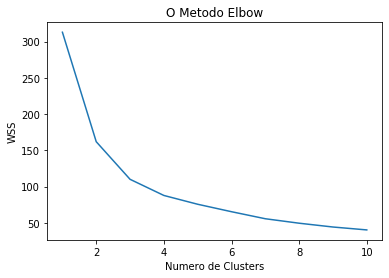

In [174]:
from sklearn.cluster import KMeans
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,round(kmeans.inertia_,2))
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

### 7. Using kmeans fit predict 

In [175]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### 8. Plot chart our k-means 2 clusters

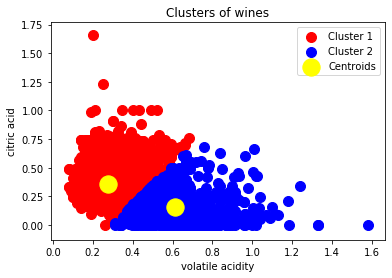

In [176]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of wines')
plt.xlabel('volatile acidity')
plt.ylabel('citric acid')
plt.legend()
plt.show()

### 9. With 4 clusters

In [177]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

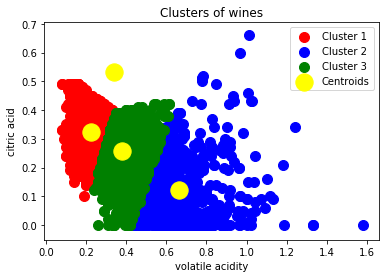

In [178]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of wines')
plt.xlabel('volatile acidity')
plt.ylabel('citric acid')
plt.legend()
plt.show()

### 10. With 5 clusters

In [179]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

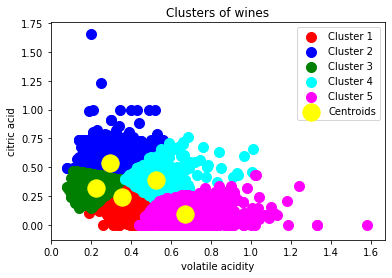

In [180]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of wines')
plt.xlabel('volatile acidity')
plt.ylabel('citric acid')
plt.legend()
plt.show()